# Predicting AdClick with Logtstic Regression and DecisionTrees

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
#reading data
df=pd.read_csv("advertising.csv")
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [26]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [27]:
#renaming columns without space
columns=['DailyTimeSpentonSite', 'Age', 'AreaIncome',
       'DailyInternetUsage', 'AdTopicLine', 'City', 'Male', 'Country',
       'Timestamp', 'ClickedonAd']
df.columns=columns
df.head()

,DailyTimeSpentonSite,Age,AreaIncome,DailyInternetUsage,AdTopicLine,City,Male,Country,Timestamp,ClickedonAd
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [28]:
df.info()

# data has 10 variables and 1000 columns
# Good news that there are no null values so we don't have to work with missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DailyTimeSpentonSite  1000 non-null   float64
 1   Age                   1000 non-null   int64  
 2   AreaIncome            1000 non-null   float64
 3   DailyInternetUsage    1000 non-null   float64
 4   AdTopicLine           1000 non-null   object 
 5   City                  1000 non-null   object 
 6   Male                  1000 non-null   int64  
 7   Country               1000 non-null   object 
 8   Timestamp             1000 non-null   object 
 9   ClickedonAd           1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [29]:
df.describe()

# For all the numerical variables we can see the five numbers summary
# Lets quickly analyze all numerical values one by one

,DailyTimeSpentonSite,Age,AreaIncome,DailyInternetUsage,Male,ClickedonAd
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [30]:
# Mean value of time spent on site spans from 32 seconds to 11/2 min with mean lying more than a minute
# Age spans from 19 to 61 with mean and median lying at 36 and 35 respectively.
# AreaIncome spans from 13K to 79K and mean and median lying at 55k and 57 respectively.
# Daily Internet usage ranges from 104 min to 269 minutes with mean and median lying at 180 min and 183 min respectively.
# Male and Female are in similar ratios with female slightly higher.
# Clicked on Ad is about 50% from the data above.

/users/rpmac/mlpython/env/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/users/rpmac/mlpython/env/lib/python3.9/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


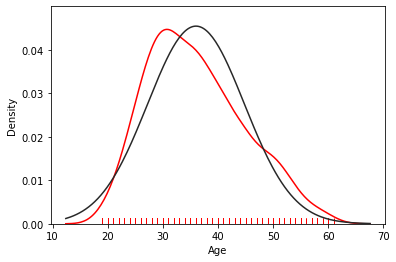

In [31]:
# Lets look at some variance plots
from scipy.stats import norm
sns.distplot(df.Age, hist=False, color='r', rug=True,fit=norm);

/users/rpmac/mlpython/env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/users/rpmac/mlpython/env/lib/python3.9/site-packages/seaborn/distributions.py:2065: FutureWarning: Using `vertical=True` to control the orientation of the plot  is deprecated. Instead, assign the data directly to `y`. 
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='DailyTimeSpentonSite'>

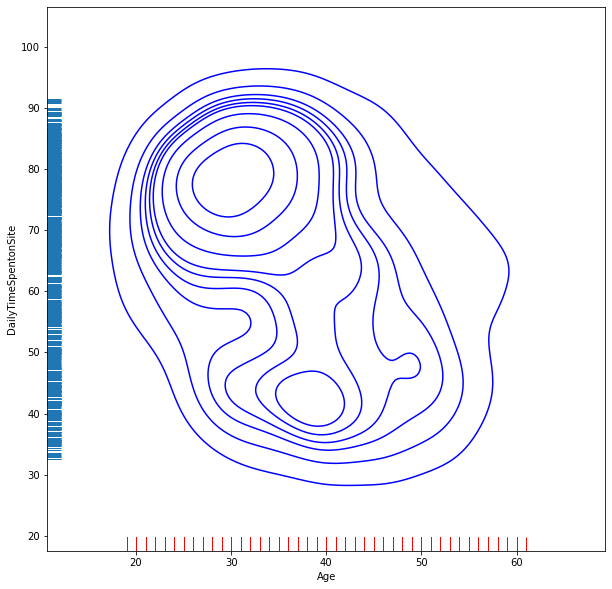

In [32]:
# We can see that Age has nomal standard behaveiour

# Lets look at relationship between age and daily time spend on site
f, ax = plt.subplots(figsize=(10, 10))
sns.kdeplot(df.Age, df['DailyTimeSpentonSite'], color="b", ax=ax)
sns.rugplot(df.Age, color="r", ax=ax)
sns.rugplot(df['DailyTimeSpentonSite'], vertical=True, ax=ax)

In [33]:
# We can see younger audience spends more time on site, Audience with age<55 spends more time on site that older adults


/users/rpmac/mlpython/env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


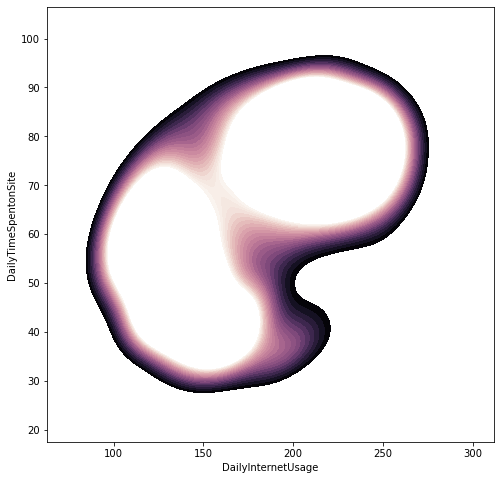

In [34]:
# Lets look at interdependence between TimeSPentonSite and DailyInternetUsage
f, ax = plt.subplots(figsize=(8, 8))
cmap = sns.cubehelix_palette(as_cmap=True, start=0, dark=0, light=5, reverse=True)
sns.kdeplot(df['DailyInternetUsage'],df["DailyTimeSpentonSite"],
    cmap=cmap, n_levels=100, shade=True);

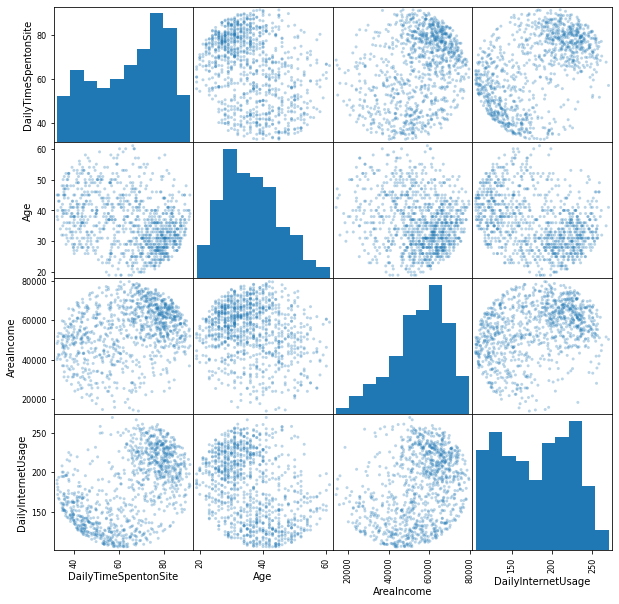

In [35]:
# We can see that the more time these folks spend on internet, the more thime they spend on sit

# lets use scatter matrix on further numerical variables

from pandas.plotting import scatter_matrix
scatter_matrix(df[['DailyTimeSpentonSite', 'Age','AreaIncome', 'DailyInternetUsage']],
    alpha=0.3, figsize=(10,10));

# We can infer the following from the from above scatter matrix-

- the more time folks spent on sit m the more internetusage they have
- The more time they spend on site, they have more income, rich folks spend time on the site often
- The folks that happen to spend more time on the site tend to be younger. 


In [36]:
# Lets see whats going on with the categorical data
df.select_dtypes(include=['object']).describe()


,AdTopicLine,City,Country,Timestamp
count,1000,1000,1000,1000
unique,1000,969,237,1000
top,Stand-alone well-modulated product,Lisamouth,France,2016-01-08 00:17:27
freq,1,3,9,1


In [37]:
# We can see from above that AdTopic is unique everytime so we can remove this. ( it does not add value)
# City is almost unique so it doesnot add value either, so we will remove it.
#Lets explore further with country

In [38]:
#df.Country.value_counts(sort=True, ascending=False) # Either column can be used

pd.crosstab(index=df.Country, columns='count').sort_values(['count'], ascending=False).head(10)

col_0,count
Country,
France,9
Czech Republic,9
Afghanistan,8
Australia,8
Turkey,8
South Africa,8
Senegal,8
Peru,8
Micronesia,8


### Country is almost very infrequent,, this not adding value to the generalized mode. So we will be dropping three columns out of 4.

In [39]:
 df.select_dtypes(include=['object']).columns

Index(['AdTopicLine', 'City', 'Country', 'Timestamp'], dtype='object')

In [40]:

#lets drop all other columns othan Timestamp
df=df.drop(['AdTopicLine', 'City', 'Country'], axis=1)
df.head()

,DailyTimeSpentonSite,Age,AreaIncome,DailyInternetUsage,Male,Timestamp,ClickedonAd
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0


In [41]:
#Lets expand the Timestamp column
df.Timestamp=pd.to_datetime(df.Timestamp) # This changes the object to dateimeobject
df['Month']=df.Timestamp.dt.month
df['DayofMonth']=df.Timestamp.dt.month
df['DayofWeek']=df.Timestamp.dt.dayofweek
df['Hour']=df.Timestamp.dt.hour

# Now lets remove the timestamp column
df=df.drop('Timestamp', axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DailyTimeSpentonSite  1000 non-null   float64
 1   Age                   1000 non-null   int64  
 2   AreaIncome            1000 non-null   float64
 3   DailyInternetUsage    1000 non-null   float64
 4   Male                  1000 non-null   int64  
 5   ClickedonAd           1000 non-null   int64  
 6   Month                 1000 non-null   int64  
 7   DayofMonth            1000 non-null   int64  
 8   DayofWeek             1000 non-null   int64  
 9   Hour                  1000 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 78.2 KB


In [42]:
# Lets divide data into x and y , independent and dependent variable

x=df.loc[:,df.columns!="ClickedonAd"]

y= df.loc[:,df.columns=="ClickedonAd"]

x.shape



(1000, 9)

In [43]:
# Feature Importance
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# apply K best algorithm
best_features=SelectKBest(score_func=chi2, k=9)
freatures_rank= best_features.fit(x,y)
freatures_rank.scores_

array([2.16195140e+03, 5.19470827e+02, 7.41376597e+05, 6.61772602e+03,
       7.50519751e-01, 2.51768405e-01, 2.51768405e-01, 5.22193211e-03,
       9.33962264e+00])

In [44]:
freatures_rank2=pd.DataFrame(freatures_rank.scores_)
columns_names=pd.DataFrame(x.columns)
scores=pd.concat([columns_names,freatures_rank2], axis=1)
scores.columns=['Columns','FeatureScores']
scores.sort_values(by='FeatureScores', ascending=False)

,Columns,FeatureScores
2,AreaIncome,741376.597205
3,DailyInternetUsage,6617.726024
0,DailyTimeSpentonSite,2161.951402
1,Age,519.470827
8,Hour,9.339623
4,Male,0.750520
5,Month,0.251768
6,DayofMonth,0.251768
7,DayofWeek,0.005222


In [45]:


#Train Test Split

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3,random_state=42)

In [46]:
print("x shape {} :".format(x.shape))
print("y shape {} :".format(y.shape))
print("x_train shape {} :".format(x_train.shape))
print("y_train shape {} :".format(y_train.shape))
print("x_test shape {} :".format(x_test.shape))
print("y_test shape {} :".format(y_test.shape))

x shape (1000, 9) :
y shape (1000, 1) :
x_train shape (700, 9) :
y_train shape (700, 1) :
x_test shape (300, 9) :
y_test shape (300, 1) :


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)
y_preds=logmodel.predict(x_test)

# score of the training model
print("Score of model prediction is : {} ".format(logmodel.score(x,y)))

# accuracy of prediction
print("score of model testing is : {} ".format(accuracy_score(y_preds,y_test)))

# confusion matrix
cm=confusion_matrix(y_test,y_preds)
cm

Score of model prediction is : 0.911 
score of model testing is : 0.89 


/users/rpmac/mlpython/env/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/users/rpmac/mlpython/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[139,   7],
       [ 26, 128]])

In [48]:
# we can see that the model trained well on the training data and predicted on unseen data by 89% accuracy
# The confusion matrix shows accurate prediction of 139 TP and 128 TN while 26 FP and 7 FN

# Next lets try to fit a Decision tree classifier through this data

from sklearn.tree import DecisionTreeClassifier


dtmodel=DecisionTreeClassifier()
dtmodel.fit(x,y)
y_preds= dtmodel.predict(x_test)

# model fit score
print("The DT model fitted on the data {} ".format(dtmodel.score(x,y)))

# model accuracy score on unseen data
print("The accuracy score of unseen data is : {} ".format(accuracy_score(y_preds,y_test)))

# confusion matrix
cm2=confusion_matrix(y_test,y_preds)
cm2


The DT model fitted on the data 1.0 
The accuracy score of unseen data is : 1.0 


array([[146,   0],
       [  0, 154]])

In [49]:
# It can be concluded that the decision tree model predicted better on the data


In [50]:
feature_names=list(x.columns)
feature_names

['DailyTimeSpentonSite',
 'Age',
 'AreaIncome',
 'DailyInternetUsage',
 'Male',
 'Month',
 'DayofMonth',
 'DayofWeek',
 'Hour']

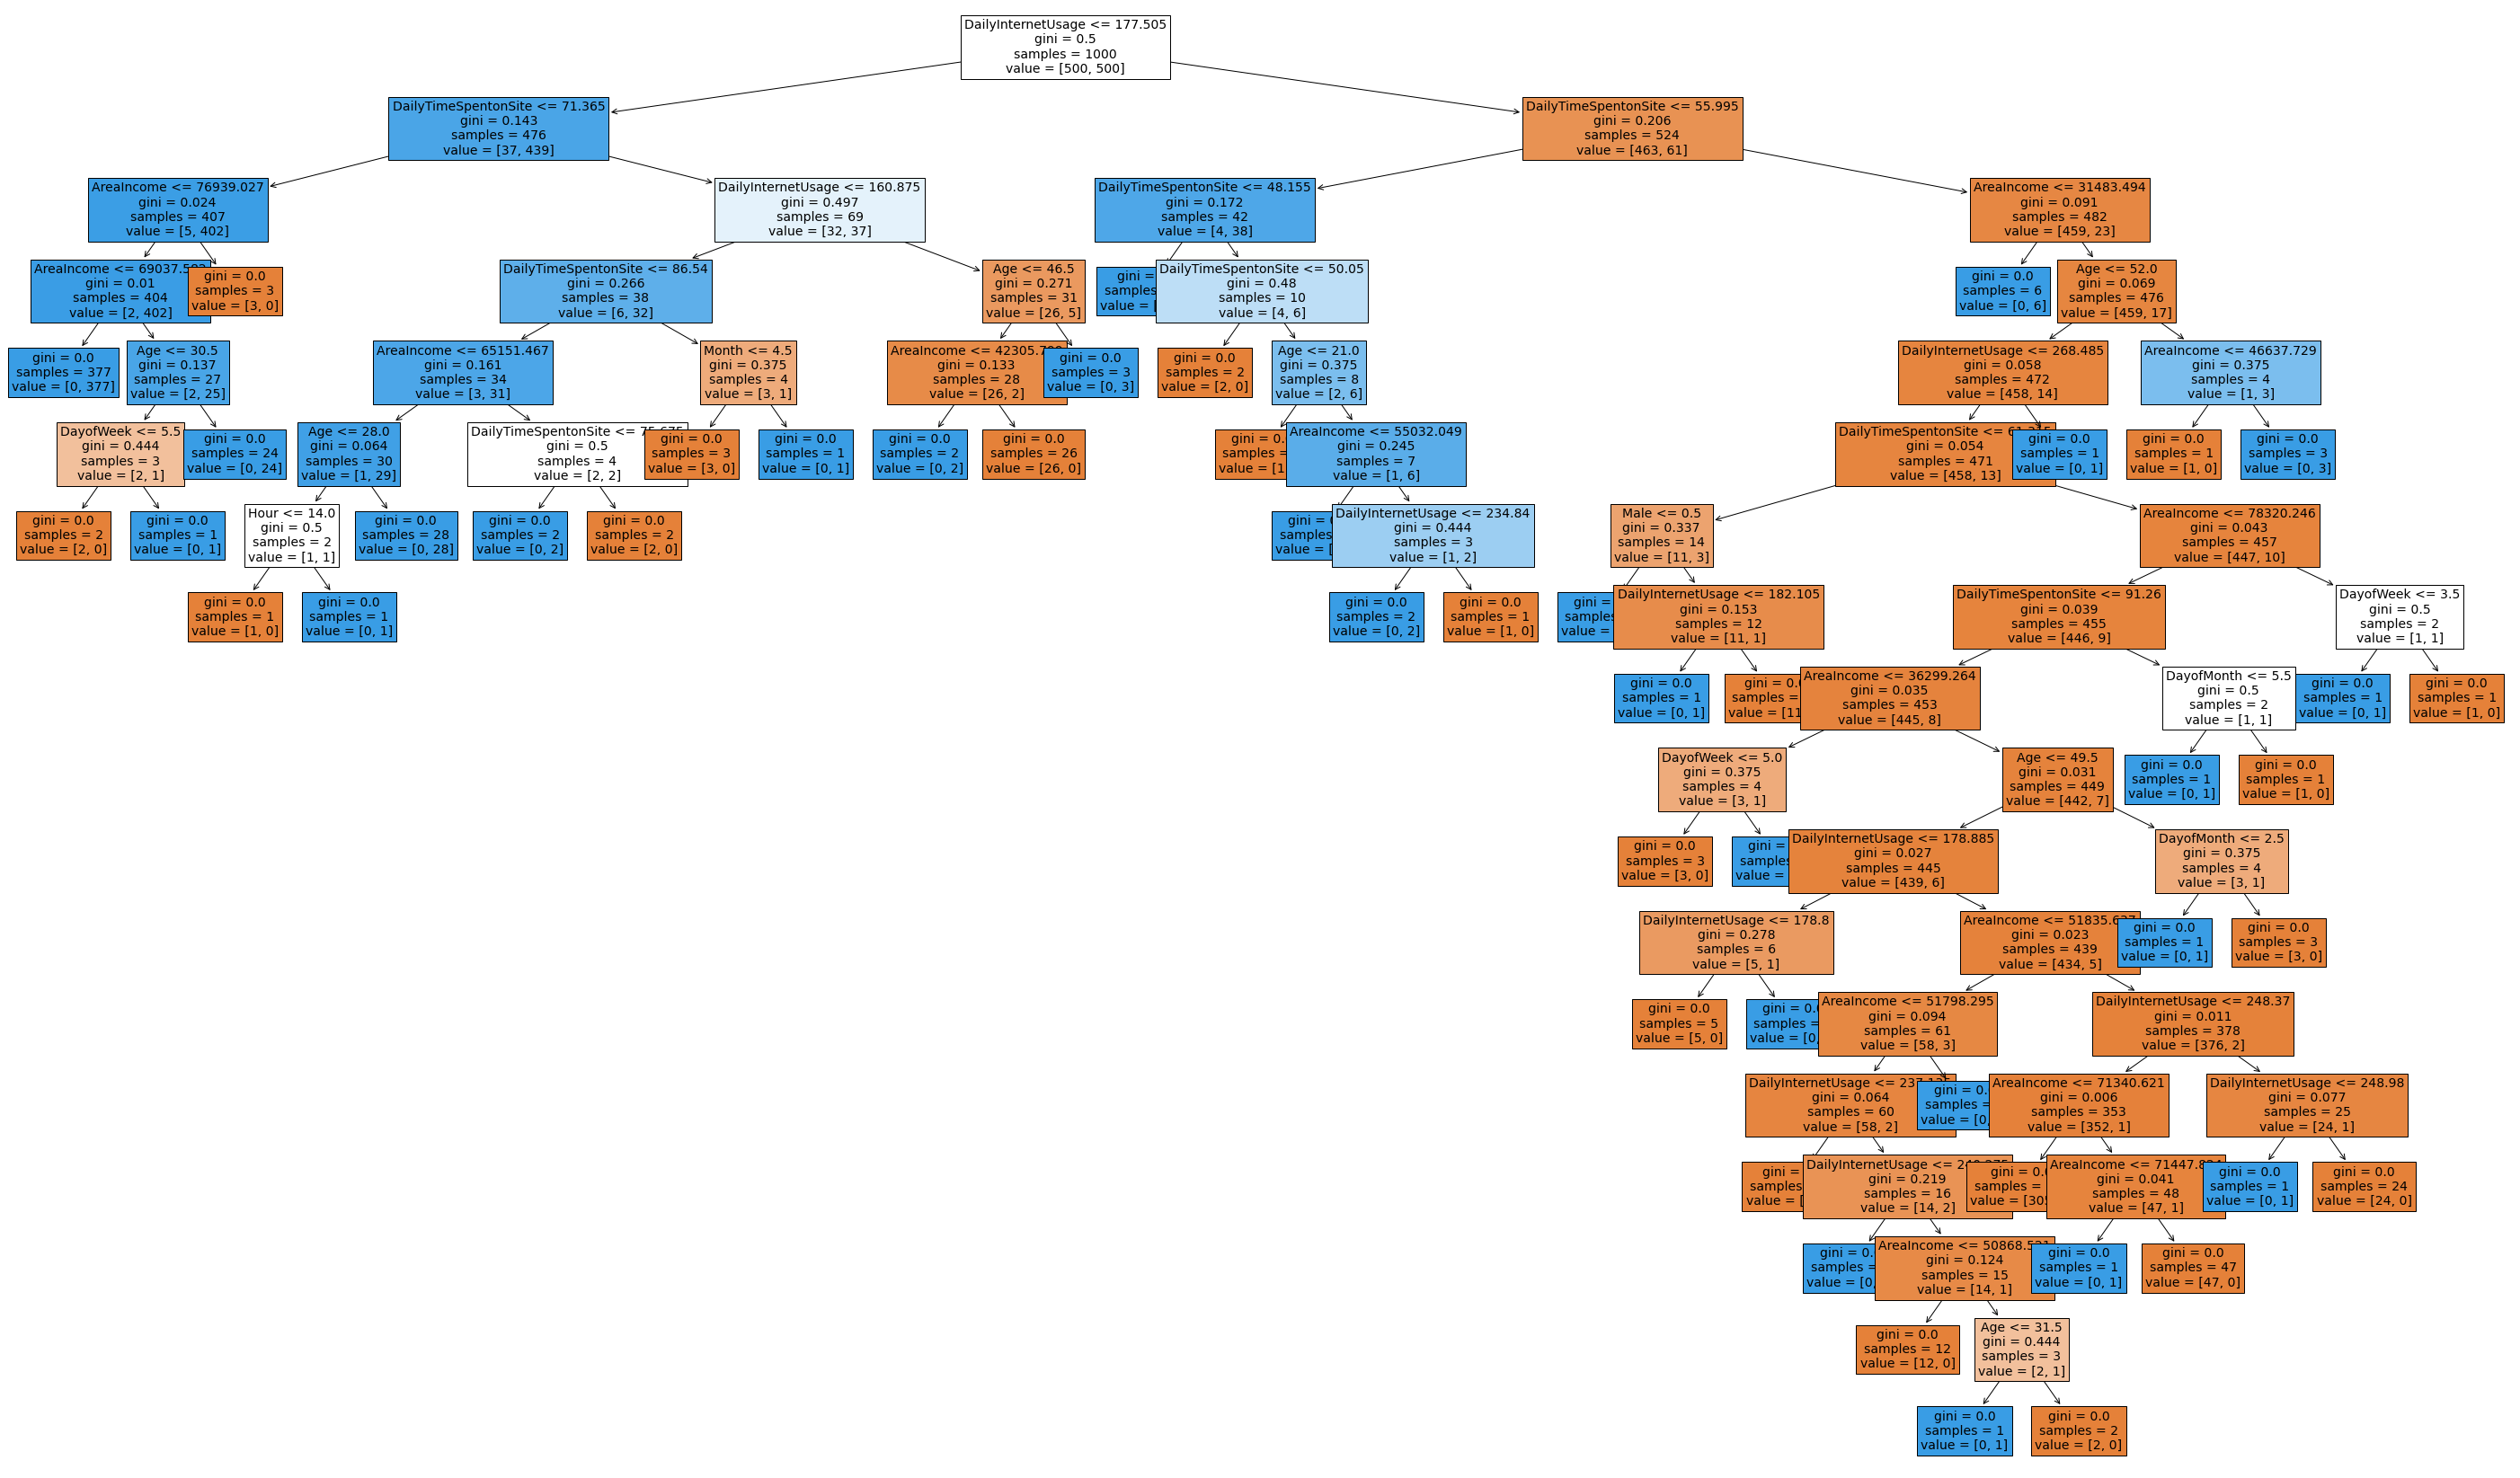

In [51]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text



plt.figure(figsize=(50,30))
plot_tree(dtmodel,
          feature_names=feature_names,
          filled=True, fontsize=14);
plt.savefig("AdClickDecisionTree.png")